### [산점도 그래프]
- 두 개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [1]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# [2] 데이터 준비
F_DATA = r'auto_mpg.csv'

In [3]:
# [3] CSV => DataFrame으로 저장
dataDF = pd.read_csv(F_DATA)

In [4]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
sr1 = dataDF.corr(numeric_only=True)['mpg']

In [ ]:
plt.legend()

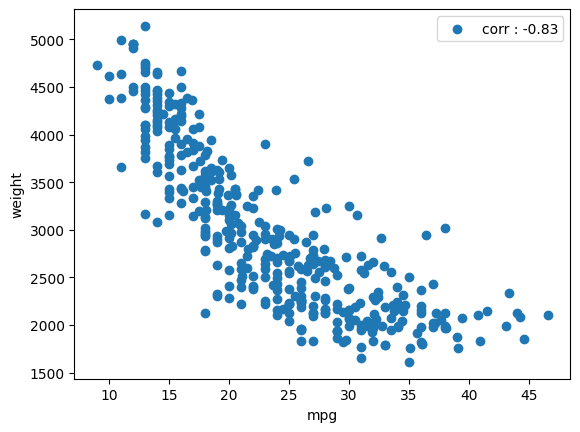

In [24]:
# - [4-2] 
plt.scatter(dataDF['mpg'], dataDF['weight'], label = f'corr : {round(list(sr1)[3],2)}')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

In [31]:
dataDF.columns[1:]

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin', 'car name'],
      dtype='object')

cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

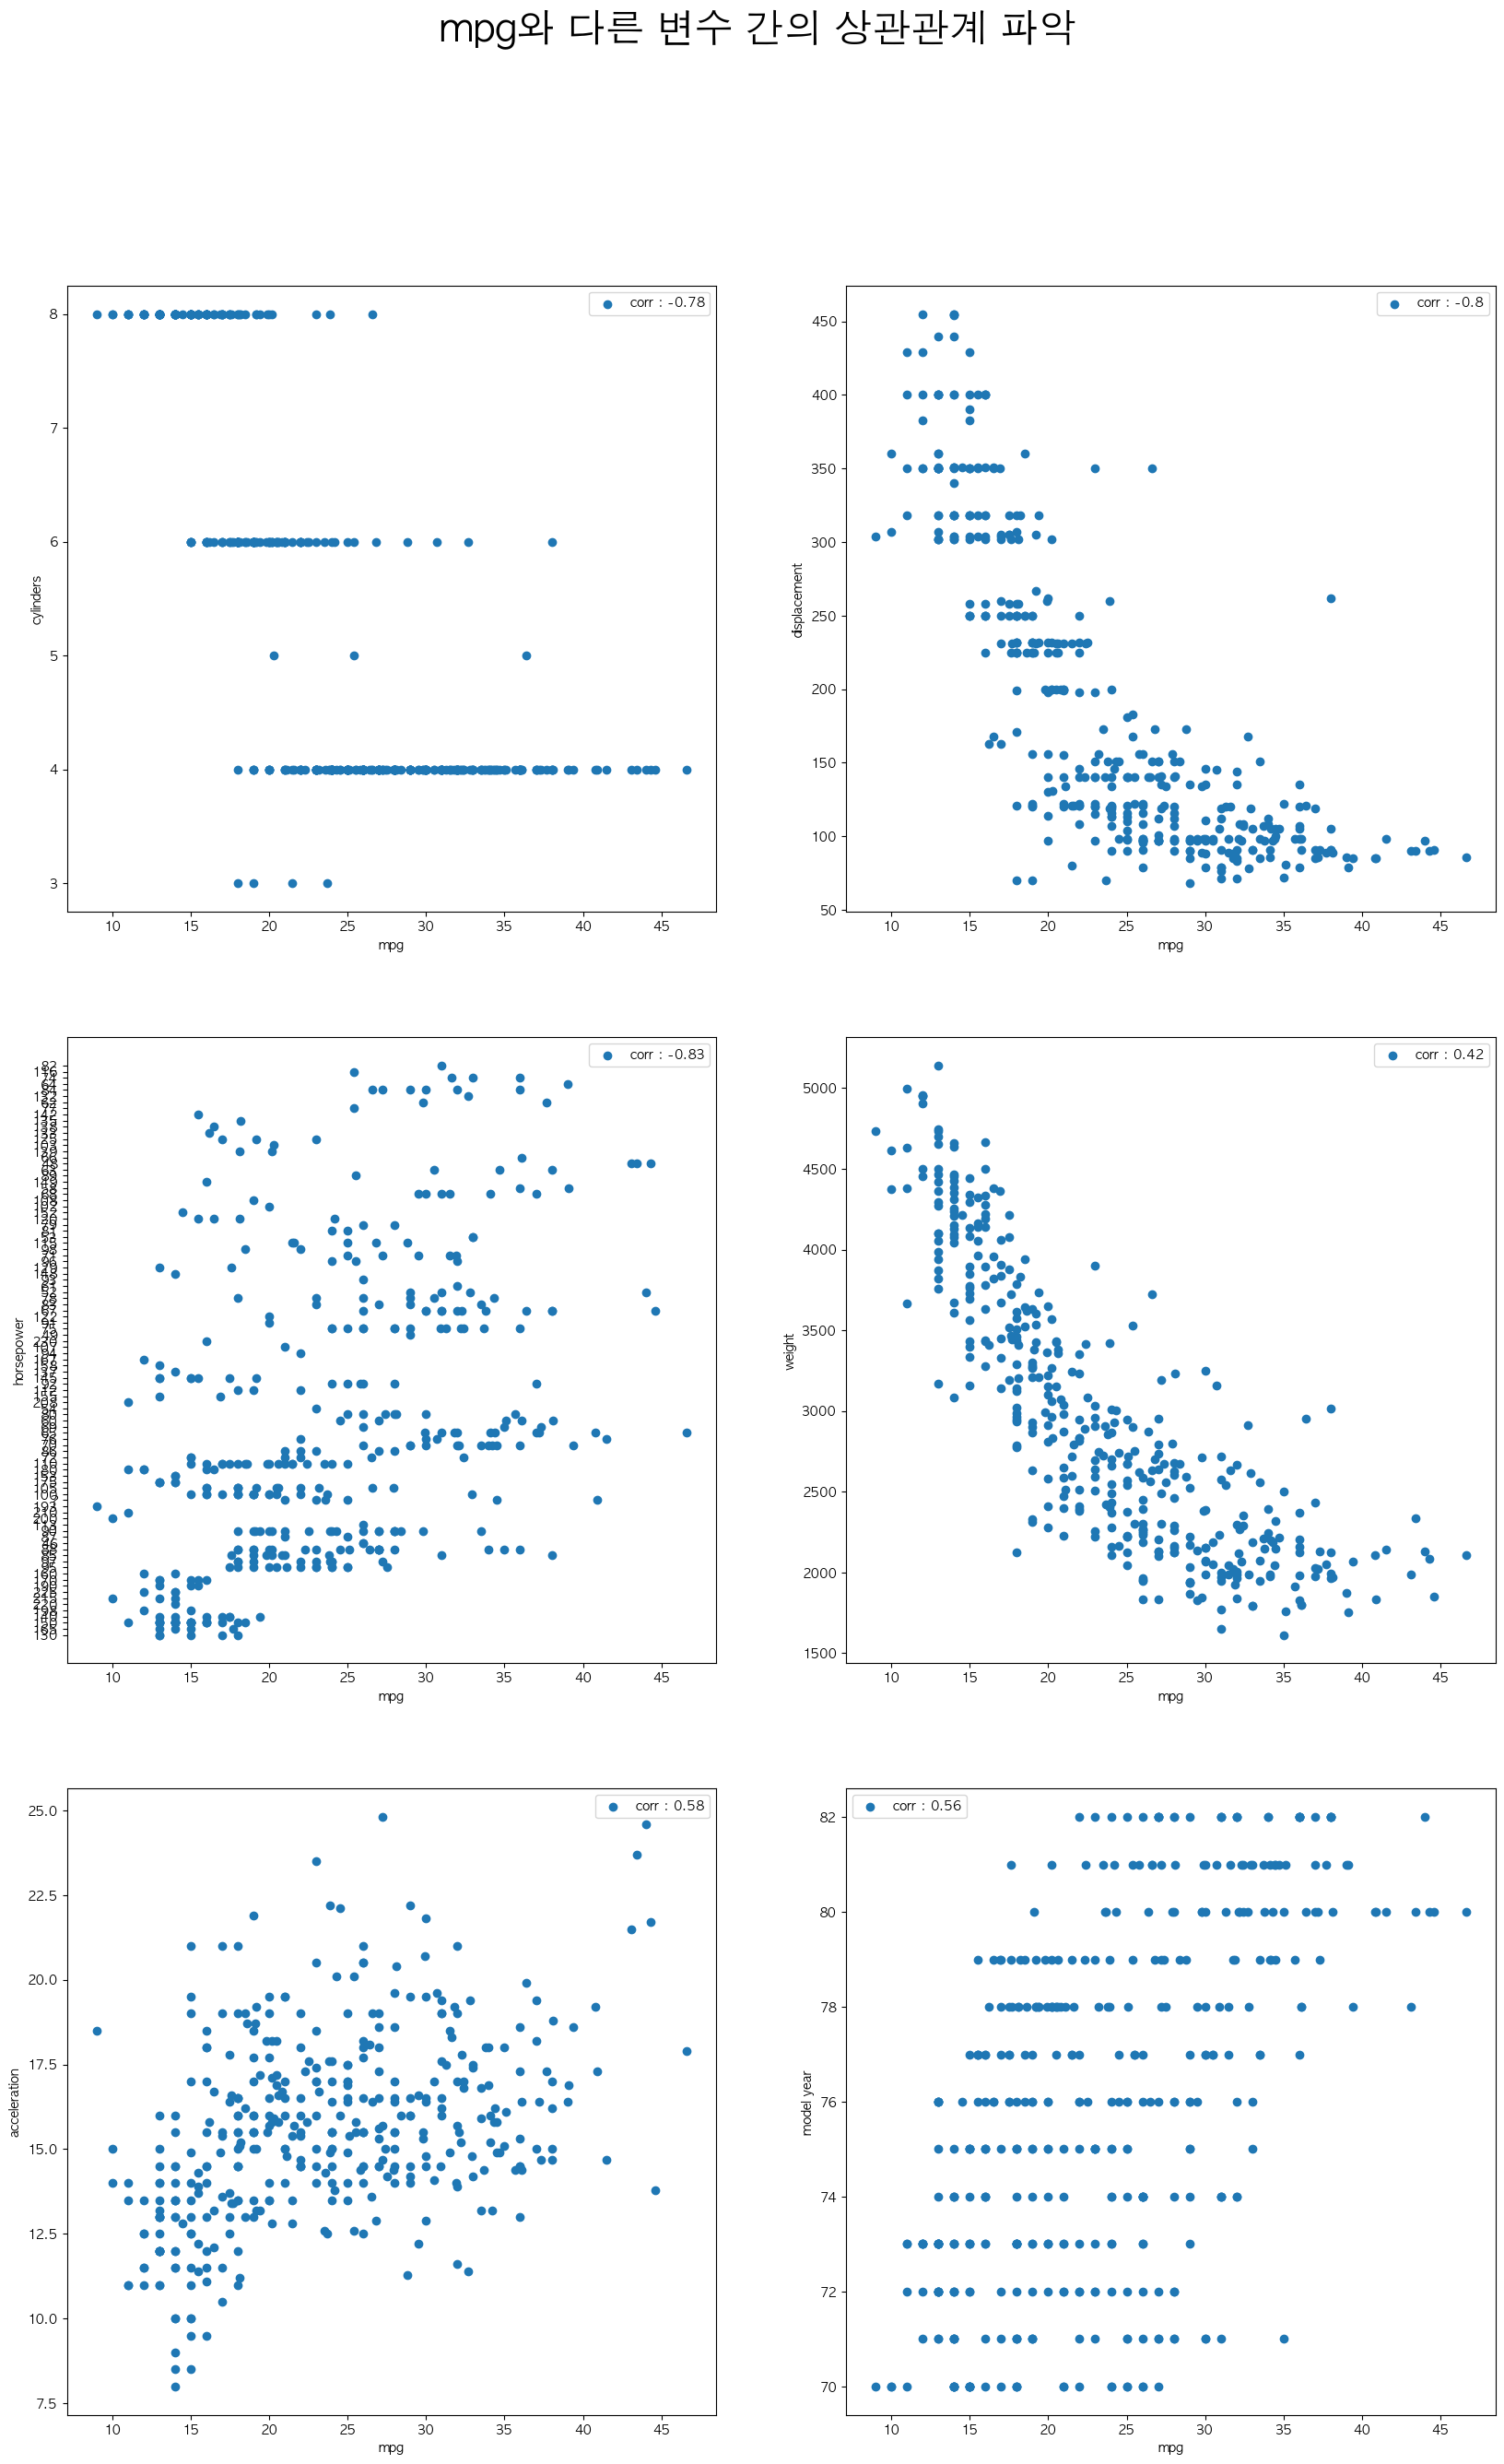

In [78]:
fig, axes = plt.subplots(3, 2, figsize = (20, 30))

for i in range(3):
    for j in range(2):
        if i == 3 and j == 1:
            continue
        else:
            axes[i, j].scatter(dataDF['mpg'], dataDF[dataDF.columns[1:][i*2 + j]],
                               label = f'corr : {round(list(sr1[1:])[i*2 + j], 2)}')
            axes[i, j].set_xlabel('mpg')
            axes[i, j].set_ylabel(dataDF.columns[1:][i*2 + j])
            axes[i, j].legend()

plt.rcParams['font.family'] = 'AppleGothic'
plt.suptitle('mpg와 다른 변수 간의 상관관계 파악', fontsize = 30)
# plt.tight_layout()
plt.show()